In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from lib import row_count_distribution, count_of_B_per_A

In [4]:
df_prior=pd.read_csv("data/processed/order_products__prior.csv.gz")
df_train=pd.read_csv("data/processed/order_products__train.csv.gz")
df=pd.concat([df_prior, df_train], axis=0)
df_orders=pd.read_csv("data/orders.csv.gz")
df2=df[["order_id", "product_id"]].merge(df_orders[["order_id", "user_id"]], on="order_id")
df_products = pd.read_csv("data/products.csv.gz")

How many orders?  How many products?  How many users?

In [11]:
print("Orders:", len(set(df_orders.order_id)))

Orders: 3421083


In [12]:
print ("Users:", len(set(df_orders.user_id)))

Users: 206209


In [35]:
print("Products:", len(np.unique(df.product_id)))

products: 49685


In [55]:
len(df_train), len(df)

(1384617, 33819106)

In [58]:
df.columns

Index(['Unnamed: 0', 'order_id', 'product_id', 'add_to_cart_order',
       'reordered'],
      dtype='object')

### Product ordering count

Number of orders: 3346083
Num products with support > 0.25%:  638


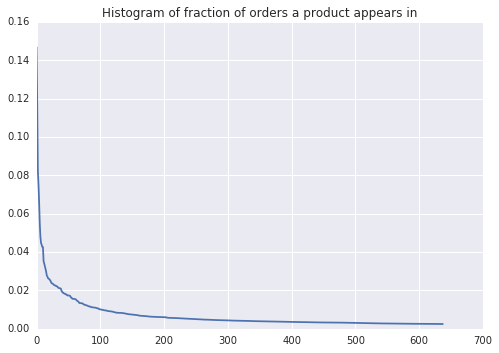

In [72]:
df_prodcount=row_count_distribution(df, "product_id")
num_orders=len(np.unique(df.order_id))
df_prodcount=df_prodcount.merge(df_products[["product_id", "product_name"]])
df_prodcount["frac"]=df_prodcount["count"]/float(num_orders)
frac=df_prodcount["frac"]
frac_threshold=0.0025
plt.plot(frac[frac > frac_threshold])
plt.title("Histogram of fraction of orders a product appears in")
print ("Number of orders:", num_orders)
print("Num products with support > %.2f%%: "%(100*frac_threshold), len(frac[frac> frac_threshold]))

###Most frequently ordered items

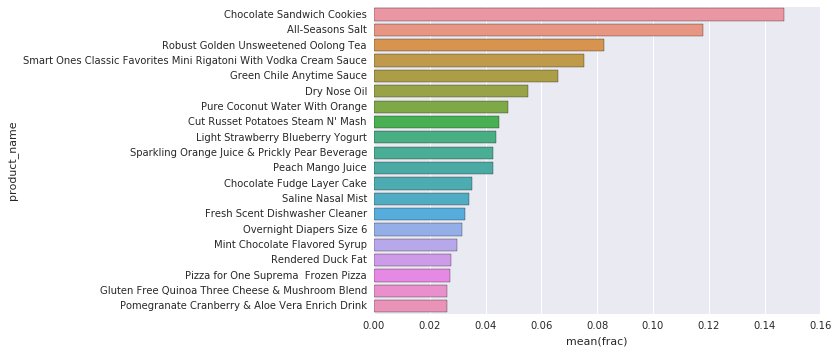

In [73]:
data=df_prodcount[:20]#.set_index("product_name")
sns.barplot(y=data.product_name, x=data.frac, orient="h")


### Number of orders per user

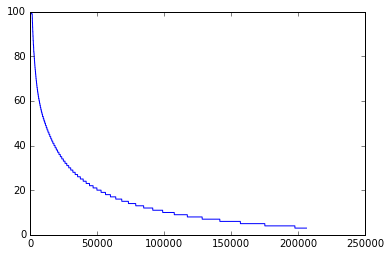

In [31]:
y=count_of_B_per_A(df2, "user_id", "order_id")
plt.plot(y["count"])

### Basket Size

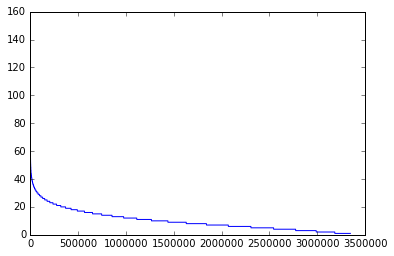

In [32]:
df_ordersize=row_count_distribution(df, "order_id")
plt.plot(df_ordersize["count"]);